=== Création de la distribution de masse ===
EGFF = {{'FN'}:0.5; {'AH'}:0.3; set():0.2}
EF = {{'FN'}:0.7; set():0.3}
OP = {{'FN'}:0.5; {'AH'}:0.5}
EAFF = {{'AH', 'FN'}:0.6; set():0.4}
RPE = {{'AH'}:0.6; set():0.4}

=== La croyance et la plausibilite ===
bel_1({FN, AH}) = 0.8
pl_1({FN, AH}) = 0.8
bel_1({FN, AH}) = 0.7
pl_1({FN, AH}) = 0.7

=== Combinaisons des masses par fusion de Dempster-Shafer ===
Combinaisons des masses EGFF et EF = {{'FN'}:1.0}
Combinaisons des masses EGFF et OP = {{'FN'}:0.625; {'AH'}:0.37499999999999994}
Combinaisons des masses EGFF ET EAFF = {{'FN'}:0.625; {'AH'}:0.375}
Combinaisons des masses EGFF ET RPE = {{'AH'}:1.0}

=== Combinaisons des masses conjunctive de Dempster-Shafer ===
Combinaisons des masses de EGFF, EAFF, and OP = {{'FN'}:0.625; {'AH'}:0.375}
Combinaisons des masses de EF, EAFF, and OP = {{'FN'}:1.0}


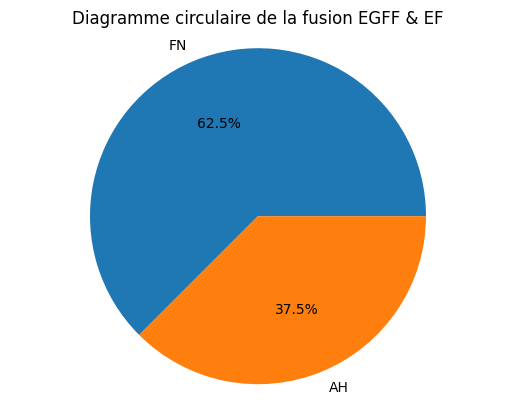

In [4]:
#Importation des librairies

from __future__ import print_function
from pyds import MassFunction
import matplotlib.pyplot as plt


print('=== Création de la distribution de masse ===')
# Utilisation d'une liste de tuples
EGFF = MassFunction([({'FN'}, 0.5), ({'AH'}, 0.3), ({}, 0.2)]) # Experts en gestion des feux de forêt (EGFF)
print('EGFF =', EGFF)
EF = MassFunction([({'FN'}, 0.7), ({}, 0.3)])  # Écologistes des forêts
print('EF =', EF)
OP = MassFunction([({'FN'}, 0.5), ({'AH'}, 0.5)])  # Opinion publique
print('OP =', OP)
EAFF = MassFunction([({'FN', 'AH'}, 0.6), ({}, 0.4)])  # Expert en analyse des feux de forêt
print('EAFF =', EAFF)
RPE = MassFunction()  # Responsables de la protection de l'environnement
RPE[{'AH'}] = 0.6
RPE[{}] = 0.4
print('RPE =', RPE)


#affichage de croyance et plausibilité pour chaque expert
print('\n=== La croyance et la plausibilite ===')
print('bel_1({FN, AH}) =', EGFF.bel({'FN', 'AH'}))
print('pl_1({FN, AH}) =', EGFF.pl({'FN', 'AH'}))
print('bel_1({FN, AH}) =', EF.bel({'FN'}))
print('pl_1({FN, AH}) =', EF.pl({'FN'}))


#combinaisons des masses par fusion de Dempster-Shafer
print('\n=== Combinaisons des masses par fusion de Dempster-Shafer ===')
print('Combinaisons des masses EGFF et EF =', EGFF & EF)
print('Combinaisons des masses EGFF et OP =', EGFF & OP)
print('Combinaisons des masses EGFF ET EAFF =', EGFF & EAFF)
print('Combinaisons des masses EGFF ET RPE =', EGFF & RPE)
print('\n=== Combinaisons des masses conjunctive de Dempster-Shafer ===')
print('Combinaisons des masses de EGFF, EAFF, and OP =', EGFF.combine_conjunctive(EAFF, OP))
print('Combinaisons des masses de EF, EAFF, and OP =', EF.combine_conjunctive(EAFF, OP))


# Visualisation des resultats
# Récupérez les résultats de la fusion de masses
result = EGFF & EAFF

# Obtenez les éléments focaux et leurs valeurs
labels = []  # Liste pour stocker les éléments focaux
values = []  # Liste pour stocker les valeurs associées

for focal_element in result:
    elements = list(focal_element)
    label = ", ".join(elements)  # Convertit le frozenset en une chaîne de caractères
    value = result.bel(focal_element)  # La valeur associée à l'élément focaux
    labels.append(label)
    values.append(value)

# Créez un diagramme circulaire
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Diagramme circulaire de la fusion EGFF & EF')
plt.axis('equal')  # Assurez-vous que le cercle est dessiné correctement
plt.show()
